In [2]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import curve_fit
import scipy

from NUC_functions import create_NUC_df, collapse_df,import_NUC, rc, apply_NUC

# Seaborn for plotting and styling
import seaborn as sns
sns.set_theme()

In [3]:
#choose some data to play with
#select ROI
ymin1 = 100; ymax1 = 145;
ymin2 = 125; ymax2 = 170;

temps = [35,40,45,50,55,60,70,75]

bbtemps1 = [];bbtemps2 = []; temps1 =[];temps2 = []; images1 =[]; images2 = []

for t in temps:
    #choose filepath to desired data
    path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_data/LUT/'
    cal_file1 = 'cam1_'+str(t)+'.h5'
    cal_file2 = 'cam2_'+str(t)+'.h5'
    df1 = create_NUC_df(path,cal_file1)
    df2 = create_NUC_df(path,cal_file2)
    t1,i1 = collapse_df(df1)
    t2,i2 = collapse_df(df2)
    bbtemps1.extend(np.ones(len(t1))*t)
    bbtemps2.extend(np.ones(len(t2))*t)
    temps1.extend(t1)
    temps2.extend(t2)
    images1.extend(i1)
    images2.extend(i2)

data1= {'bbtemp': bbtemps1, 'temps1': temps1,'images1':list(images1)}
data2= {'bbtemp': bbtemps2, 'temps1': temps2,'images1':list(images2)}

cam1 = pd.DataFrame.from_dict(data1)
cam2 = pd.DataFrame.from_dict(data2)
cam1

,bbtemp,temps1,images1
0,35.0,22.2,"[[23058.0, 23061.0, 23051.0, 23061.0, 23067.0,..."
1,40.0,22.3,"[[23022.0, 23035.0, 23028.0, 23031.0, 23041.0,..."
2,45.0,22.4,"[[23002.0, 23027.0, 23020.0, 23019.0, 23030.0,..."
3,45.0,22.3,"[[23002.0, 23025.0, 23019.0, 23018.0, 23031.0,..."
4,50.0,22.4,"[[23057.0, 23065.0, 23055.0, 23058.0, 23059.0,..."
5,50.0,22.5,"[[23062.0, 23069.0, 23058.0, 23061.0, 23063.0,..."
6,55.0,22.5,"[[23066.0, 23078.0, 23062.0, 23083.0, 23072.0,..."
7,55.0,22.6,"[[22984.0, 22982.0, 22975.0, 22978.0, 22991.0,..."
8,60.0,22.6,"[[23030.0, 23039.0, 23026.0, 23049.0, 23038.0,..."
9,60.0,22.5,"[[23025.0, 23034.0, 23016.0, 23041.0, 23033.0,..."


In [8]:
#import nuc calibration

cal_path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_files/NUC.h5'

image = cam1['images1'][8]
image2 = cam1['images1'][8+1]

In [5]:
m1,b1,T_ref1,m2,b2,T_ref2 = import_NUC(cal_path)

In [6]:
r_c = apply_NUC(image,T,m2,b2,T_ref2)

NameError: name 'image' is not defined

NameError: name 'image' is not defined

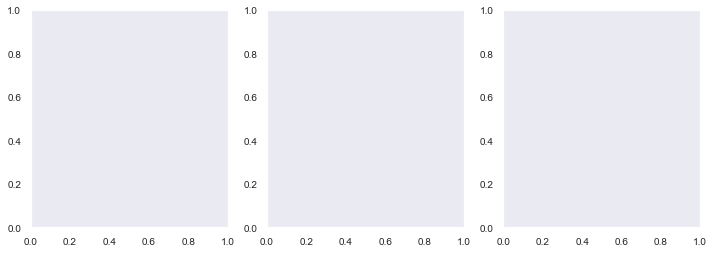

In [7]:

plt.rcParams["axes.grid"] = False
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('figure', titlesize=50)  # fontsize of the figure title

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

ax1, ax2, ax3= axes

im1 = ax1.imshow(image[120:165,100:160],cmap ='magma',vmin = 22500,vmax = 22800)
im2 = ax2.imshow(r_c[120:165,100:160],cmap ='magma',vmin = 22500,vmax = 22800)
im3 = ax3.imshow(image[120:165,100:160]-image2[120:165,100:160],cmap ='magma')
ax1.title.set_text('before NUC \n $T_{FPA} = 22.1^\circ C$ ')
ax2.title.set_text('after NUC \n $T_{FPA} = 22.1^\circ C$ ')
ax3.title.set_text('Raw Image Error Relative \n to Image w/ FPA at Reference Temperature ')


fig.colorbar(im1, ax=ax1,fraction=0.02, pad=0.01)
fig.colorbar(im2, ax=ax2,fraction=0.02, pad=0.01)
fig.colorbar(im3, ax=ax3,fraction=0.02, pad=0.01)

fig.tight_layout()

plt.show()
